## Train / Test Split
Um die trainierten Models zu überprüfen, werden wir das Datenset in Train/Test Sets aufteilen.


<AxesSubplot:>

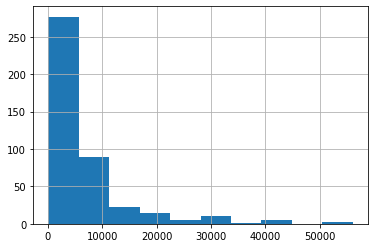

In [9]:
import os
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

import src.package.shared as sh
import src.package.consts as c
import src.package.importer as im

df = im.get_dataset('../package/dataset.csv')
df = df.dropna(subset=[c.FIELD_USAGE_CLUSTER, c.FIELD_AREA_TOTAL_FLOOR_416, c.FIELD_AREA_MAIN_USAGE])


df[c.FIELD_AREA_TOTAL_FLOOR_416].hist()

#### Features for Stratify
* Usage Cluster
* Geschossfläche

In [10]:
# combine small usage cluster for stratify
min_count = 5
counts = df[c.FIELD_USAGE_CLUSTER].value_counts()
df[c.FIELD_USAGE_CLUSTER] = np.where(df[c.FIELD_USAGE_CLUSTER].isin(counts[counts < min_count].index), 'OTHERS', df[c.FIELD_USAGE_CLUSTER])

# print to notebook
df[c.FIELD_USAGE_CLUSTER].value_counts()

WOHNEN           131
SCHULEN          110
HALLEN            42
BUERO             40
BEHERBERGUNG      32
BETRIEB           31
GESUNDHEIT        12
KULTUS_KULTUR     11
ANDERES           10
OTHERS             9
Name: usage_cluster, dtype: int64

In [11]:
# create distribution classes for GF
distribution_bins = 10
labels = list(range(0, distribution_bins))
df['gf_cat'] = pd.qcut(df[c.FIELD_AREA_TOTAL_FLOOR_416], distribution_bins, labels=labels)
df['gf_cat'].value_counts()

0    43
1    43
2    43
4    43
5    43
7    43
8    43
9    43
3    42
6    42
Name: gf_cat, dtype: int64

#### Train & Test Set
Save train & test set to CSV

In [12]:
# TODO: stratify=df[[c.FIELD_USAGE_CLUSTER, 'gf_cat']] multiple stratify columns?
train_set, test_set = train_test_split(df, test_size=0.2, random_state=10, stratify=df['gf_cat'])

# save train set
file_path_train = sh.export_directory_path('train_set.csv')
train_set.to_csv(file_path_train, index=False, sep=',')
print(train_set.describe())

# save test set
file_path_test = sh.export_directory_path('test_set.csv')
test_set.to_csv(file_path_test, index=False, sep=',')
print(test_set.describe())

                id      nom_zip   index_year  index_month    planzeit  \
count   342.000000   304.000000   306.000000    306.00000  225.000000   
mean   2993.435673  5904.187500  2008.431373      4.45098   20.697778   
std    2085.980148  2670.497467     6.663593      1.58452   12.842009   
min     188.000000  1001.000000  1979.000000      4.00000    2.000000   
25%    1331.000000  3400.000000  2007.000000      4.00000   12.000000   
50%    2381.000000  6550.000000  2009.000000      4.00000   17.000000   
75%    3838.750000  8152.000000  2012.000000      4.00000   26.000000   
max    6803.000000  9507.000000  2019.000000     10.00000   67.000000   

          bauzeit  area_building  area_built_up  num_floors  \
count  277.000000     283.000000     261.000000  342.000000   
mean    19.148014    1719.212014    3846.674330    4.045322   
std     12.615687    2288.499286    4154.183751    2.609787   
min      3.000000      67.000000      35.000000    0.000000   
25%     13.000000     446.5